In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Business Understanding
Staying in Seattle one of the best experince. This dataset provided from AirBnB shows the accommodations in this city.

We have three questions that related to this city.

- Q1: What is the average price in Seattle?
- Q2: What are the top expensive neighborhoods? 
- Q3: How many accommodations in each property type?

### Data Understanding
The dataset contain three CSV files we will use the one that we need.

In [63]:
listing = pd.read_csv('listings.csv')
cal = pd.read_csv('calendar.csv')
rev = pd.read_csv('reviews.csv')

In [64]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [65]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [66]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [67]:
listing.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [68]:
listing.shape

(3818, 92)

### Prepare Data
Some data preparation steps need to be done before using the dataset for exploration, including：

-  Convert string values into numbers for Price.
-  Dealing with missing values ( NaN ) from property_type. 


In [69]:
# Convert string values into numbers for Price.
listing['price'].dtype

dtype('O')

In [70]:
listing['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [71]:
listing['price'] = listing['price'].str.replace('$', '')
listing['price'] = listing['price'].str.replace(',', '')

In [74]:
listing['price'] = listing['price'].astype(float)

In [75]:
listing['price'].dtype

dtype('float64')

In [52]:
# Dealing with missing values ( NaN ) from property_type
listing['property_type'].isnull().sum()

1

In [83]:
null_pro = pd.isnull(listing['property_type'])
listing[null_pro]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2184,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN


In [91]:
listing = listing.dropna(subset = ['property_type'], axis = 0)

In [92]:
listing['property_type'].isnull().sum()

0

#### Q1: What is the average price in Seattle?

In [76]:
avr_price = listing['price'].mean()
print('The Average Price in Seattle is: {0:.2f}$'.format(avr_price))

The Average Price in Seattle is: 127.98$


#### Q2: What are the top expensive neighborhoods?

In [132]:
pro_group = listing.groupby('neighbourhood_group_cleansed').price.mean()
pro_group

neighbourhood_group_cleansed
Ballard                124.682609
Beacon Hill             94.669492
Capitol Hill           130.592593
Cascade                140.101124
Central Area           128.338753
Delridge                83.278481
Downtown               154.405660
Interbay               109.727273
Lake City               92.671642
Magnolia               177.672131
Northgate               88.550000
Other neighborhoods    119.968514
Queen Anne             157.223729
Rainier Valley          91.721519
Seward Park            108.477273
University District     93.639344
West Seattle           141.359606
Name: price, dtype: float64

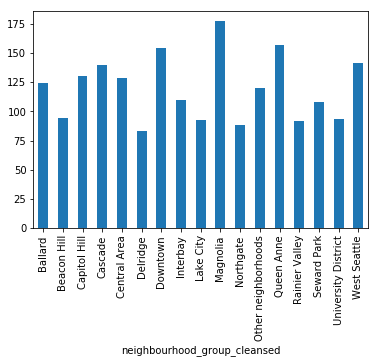

In [154]:
listing.groupby('neighbourhood_group_cleansed').price.mean().plot(kind='bar');

#### Q3: How many accommodations in each property type?

In [152]:
listing['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

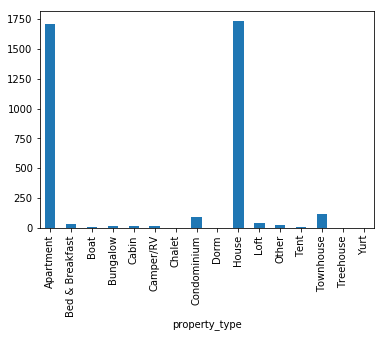

In [159]:
listing.groupby('property_type').id.count().plot(kind='bar');